In [1]:
from elliot_utils import *

In [2]:
filepath = Path.cwd().joinpath('analysis_files/mucin/')
figurepath = Path.cwd().joinpath('figures/mucin/')
mucinPalette = [sns.color_palette('bright')[0], sns.color_palette('bright')[1], 'green']

In [3]:
# Returns: The dataDF appended with a new column representing the OD600 for the sample at the given time minus its starting OD600
# dataDF: Dataframe output by the curveData2df function
def calculateDeltaOD(dataDF):
    startingOD = None
    deltaODs = []
    for index, row in dataDF.iterrows():
        if row['Hours'] == 0:
            startingOD = row['OD600']
            deltaODs.append(0)
        else:
            deltaODs.append(row['OD600'] - startingOD)
    dataDF['Delta OD600'] = deltaODs

# Returns: A subset DataFrame of "df" with only data for the specified strains and treatments
# df: A DataFrame generated by the curveData2df function. It will have the headers 'Treatment', 'OD600', 'Hours'
# strains: A list containing strain names
# treatments: A list containing treatment names
# If time limit is set, will only return up to the given time point in hours (inclusive)
# If treatments is set to a list, will only return values for those treatments
def sliceDFBy(df, strains, treatments, timeLimit=1000000000000):
    dataDict = {}
    for key in df.keys():
        dataDict[key] = []
    for index, row in df.iterrows():
        if row['Strain'] in strains and row['Treatment'] in treatments and row['Hours'] <= timeLimit:
            for key in dataDict.keys():
                dataDict[key].append(row[key])
    return pd.DataFrame(dataDict)

# Returns: a subset Dataframe of "df" with only data for the specified strains and treatments, with only the specified timepoints
# df: A DataFrame generated by the curveData2df function. It will have the headers 'Treatment', 'OD600', 'Hours'
# strains: A list containing strain names
# treatments: A list containing treatment names
# timepoints: A list of time points in Integer format i.e. [0, 24, 48]
def getIntervalData(df, strains, treatments, timepoints):
    dataDict = {}
    for key in df.keys():
        dataDict[key] = []
    for index, row in df.iterrows():
        if row['Hours'] in timepoints and row['Strain'] in strains and row['Treatment'] in treatments:
            for key in dataDict.keys():
                dataDict[key].append(row[key])
    return pd.DataFrame(dataDict)

In [4]:
data7224 = pd.read_csv(filepath.joinpath('7-2-24_lactos_dnfGards.csv'))
strainLocs = [
    ['L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus JV-V01', 'L. crispatus JV-V01', 'L. crispatus JV-V01', 'L. iners DSM13335', 'L. iners DSM13335', 'L. iners DSM13335', '', '', ''],
    ['L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus JV-V01', 'L. crispatus JV-V01', 'L. crispatus JV-V01', 'L. iners DSM13335', 'L. iners DSM13335', 'L. iners DSM13335', '', '', ''],
    ['L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus MV-1A-US', 'L. crispatus JV-V01', 'L. crispatus JV-V01', 'L. crispatus JV-V01', 'L. iners DSM13335', 'L. iners DSM13335', 'L. iners DSM13335', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['G. vaginalis DNF00038', 'G. vaginalis DNF00038', 'G. vaginalis DNF00038', 'G. piotii DNF00257', 'G. piotii DNF00257', 'G. piotii DNF00257', 'G. swidsinskii DNF01159', 'G. swidsinskii DNF01159', 'G. swidsinskii DNF01159', '', '', ''],
    ['G. vaginalis DNF00038', 'G. vaginalis DNF00038', 'G. vaginalis DNF00038', 'G. piotii DNF00257', 'G. piotii DNF00257', 'G. piotii DNF00257', 'G. swidsinskii DNF01159', 'G. swidsinskii DNF01159', 'G. swidsinskii DNF01159', '', '', ''],
    ['G. vaginalis DNF00038', 'G. vaginalis DNF00038', 'G. vaginalis DNF00038', 'G. piotii DNF00257', 'G. piotii DNF00257', 'G. piotii DNF00257', 'G. swidsinskii DNF01159', 'G. swidsinskii DNF01159', 'G. swidsinskii DNF01159', '', '', '']
]
treatmentLocs = [
    ['Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', '', '', ''],
    ['No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', '', '', ''],
    ['Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', ''],
    ['Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', '', '', ''],
    ['No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', '', '', ''],
    ['Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', '', '', '']
]
df7224 = curveData2df(data7224, strainLocs, treatmentLocs)
calculateDeltaOD(df7224)

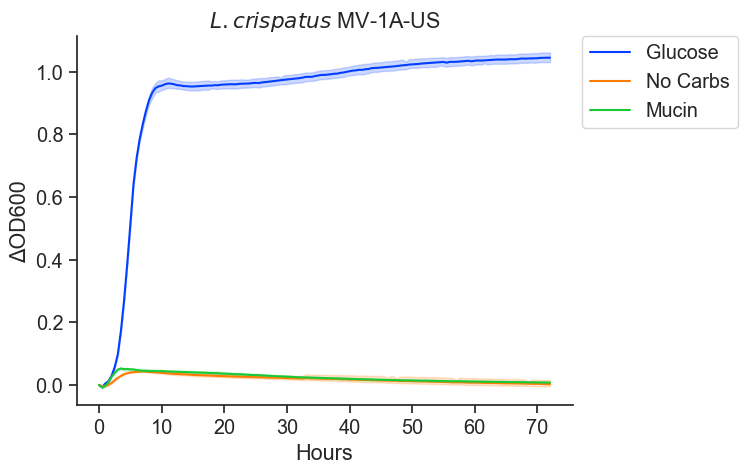

In [5]:
dataToPlot = sliceDFBy(df7224, ['L. crispatus MV-1A-US'], ['Glucose', 'No Carbs', 'Mucin'])
plot = sns.lineplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment')
plot.set(title='$\it{L. crispatus}$ MV-1A-US', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('7-2-24_Lcrispatus_MV1AUS_Mucin.png'))

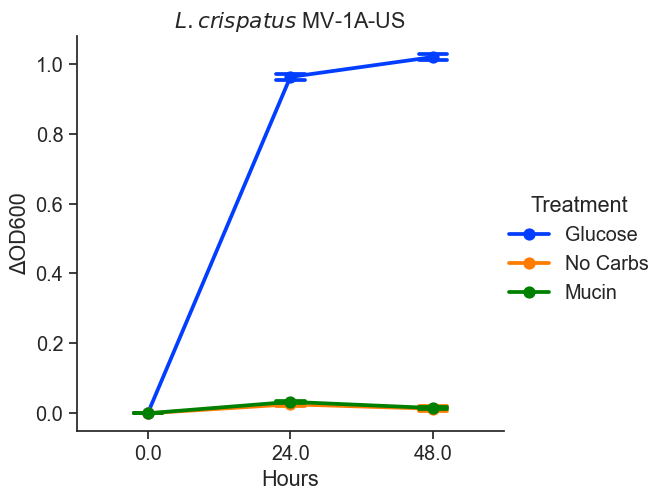

In [6]:
dataToPlot = getIntervalData(df7224, ['L. crispatus MV-1A-US'], ['Glucose', 'No Carbs', 'Mucin'], [0, 24, 48])
plot = sns.catplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=mucinPalette)
plot.set(title='$\it{L. crispatus}$ MV-1A-US', ylabel='ΔOD600')
sns.despine()
#plot.savefig(figurepath.joinpath('7-2-24_Lcrispatus_MV1AUS_interval.png'), bbox_inches='tight', dpi=300)

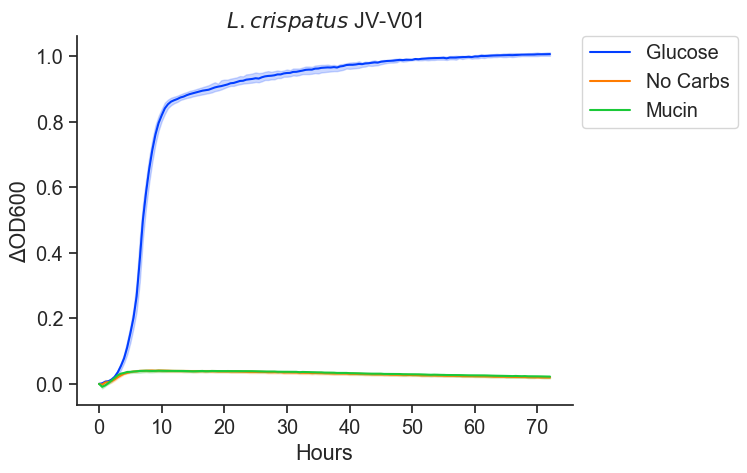

In [7]:
dataToPlot = sliceDFBy(df7224, ['L. crispatus JV-V01'], ['Glucose', 'No Carbs', 'Mucin'])
plot = sns.lineplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment')
plot.set(title='$\it{L. crispatus}$ JV-V01', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('7-2-24_Lcrispatus_JVV01_Mucin.png'))

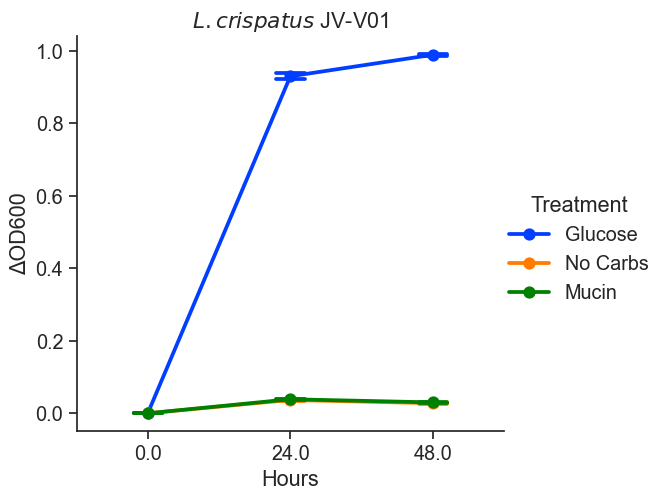

In [8]:
dataToPlot = getIntervalData(df7224, ['L. crispatus JV-V01'], ['Glucose', 'No Carbs', 'Mucin'], [0, 24, 48])
plot = sns.catplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=mucinPalette)
plot.set(title='$\it{L. crispatus}$ JV-V01', ylabel='ΔOD600')
sns.despine()
#plot.savefig(figurepath.joinpath('7-2-24_Lcrispatus_JV-V01_interval.png'), bbox_inches='tight', dpi=300)

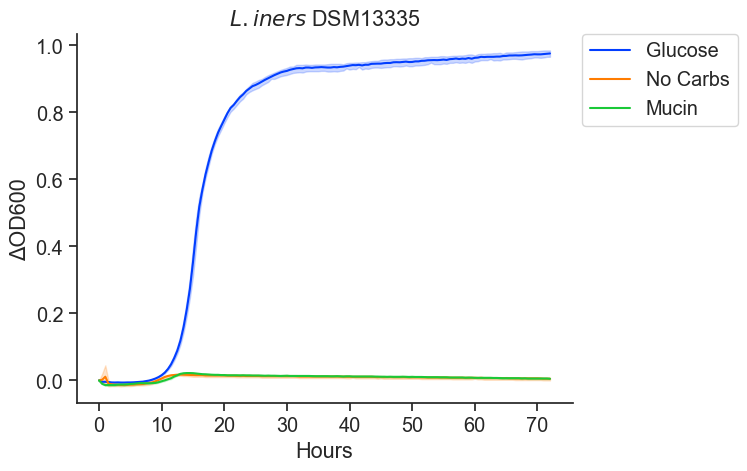

In [9]:
dataToPlot = sliceDFBy(df7224, ['L. iners DSM13335'], ['Glucose', 'No Carbs', 'Mucin'])
plot = sns.lineplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment')
plot.set(title='$\it{L. iners}$ DSM13335', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('7-2-24_Liners_DSM13335_Mucin.png'))

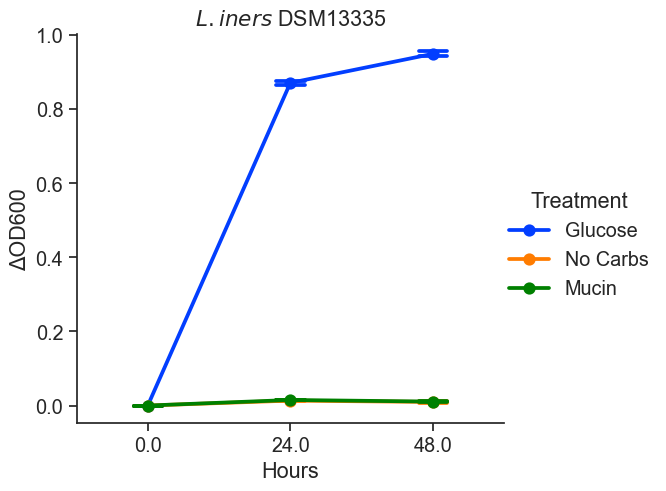

In [10]:
dataToPlot = getIntervalData(df7224, ['L. iners DSM13335'], ['Glucose', 'No Carbs', 'Mucin'], [0, 24, 48])
plot = sns.catplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=mucinPalette)
plot.set(title='$\it{L. iners}$ DSM13335', ylabel='ΔOD600')
sns.despine()
#plot.savefig(figurepath.joinpath('7-2-24_Liners_DSM13335_interval.png'), bbox_inches='tight', dpi=300)

In [11]:
data7924 = pd.read_csv(filepath.joinpath('7-9-24_gards.csv'))
strainLocs = [
    ['G. vaginalis ATCC14018', 'G. vaginalis ATCC14018', 'G. vaginalis ATCC14018', 'G. vaginalis ATCC14019', 'G. vaginalis ATCC14019', 'G. vaginalis ATCC14019', 'G. vaginalis ATCC49145', 'G. vaginalis ATCC49145', 'G. vaginalis ATCC49145', 'Negative', 'Negative', 'Negative'],
    ['G. vaginalis ATCC14018', 'G. vaginalis ATCC14018', 'G. vaginalis ATCC14018', 'G. vaginalis ATCC14019', 'G. vaginalis ATCC14019', 'G. vaginalis ATCC14019', 'G. vaginalis ATCC49145', 'G. vaginalis ATCC49145', 'G. vaginalis ATCC49145', 'Negative', 'Negative', 'Negative'],
    ['G. vaginalis ATCC14018', 'G. vaginalis ATCC14018', 'G. vaginalis ATCC14018', 'G. vaginalis ATCC14019', 'G. vaginalis ATCC14019', 'G. vaginalis ATCC14019', 'G. vaginalis ATCC49145', 'G. vaginalis ATCC49145', 'G. vaginalis ATCC49145', 'Negative', 'Negative', 'Negative'],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. piotii CCUG72427', 'G. piotii CCUG72427', 'G. piotii CCUG72427', 'G. piotii JCP8066', 'G. piotii JCP8066', 'G. piotii JCP8066', 'G. leopoldii CCUG72425', 'G. leopoldii CCUG72425', 'G. leopoldii CCUG72425'],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. piotii CCUG72427', 'G. piotii CCUG72427', 'G. piotii CCUG72427', 'G. piotii JCP8066', 'G. piotii JCP8066', 'G. piotii JCP8066', 'G. leopoldii CCUG72425', 'G. leopoldii CCUG72425', 'G. leopoldii CCUG72425'],
    ['G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. vaginalis 315-A', 'G. piotii CCUG72427', 'G. piotii CCUG72427', 'G. piotii CCUG72427', 'G. piotii JCP8066', 'G. piotii JCP8066', 'G. piotii JCP8066', 'G. leopoldii CCUG72425', 'G. leopoldii CCUG72425', 'G. leopoldii CCUG72425'],
    ['G. swidsinskii CCUG72429', 'G. swidsinskii CCUG72429', 'G. swidsinskii CCUG72429', 'G. swidsinskii CCUG72429', 'G. swidsinskii CCUG72429', 'G. swidsinskii CCUG72429', 'G. swidsinskii CCUG72429', 'G. swidsinskii CCUG72429', 'G. swidsinskii CCUG72429', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '']
]
treatmentLocs = [
    ['Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose'],
    ['No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs'],
    ['Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin'],
    ['Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose', 'Glucose'],
    ['No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs', 'No Carbs'],
    ['Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin', 'Mucin'],
    ['Glucose', 'Glucose', 'Glucose', 'No Carbs', 'No Carbs', 'No Carbs', 'Mucin', 'Mucin', 'Mucin', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '']
]
df7924 = curveData2df(data7924, strainLocs, treatmentLocs)
calculateDeltaOD(df7924)

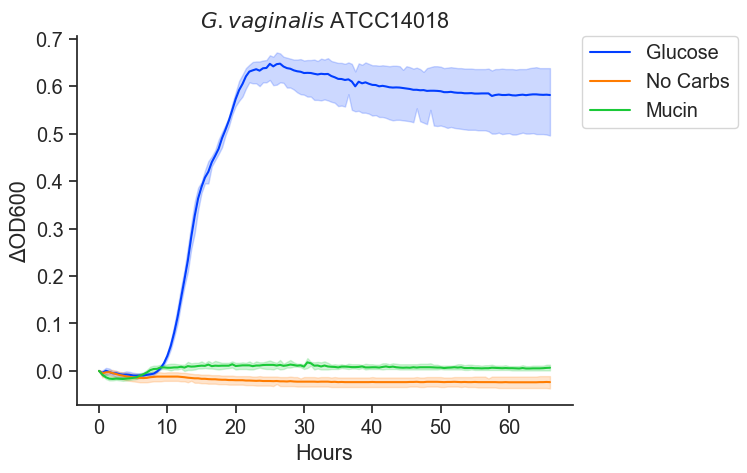

In [12]:
dataToPlot = sliceDFBy(df7924, ['G. vaginalis ATCC14018'], ['Glucose', 'No Carbs', 'Mucin'])
plot = sns.lineplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment')
plot.set(title='$\it{G. vaginalis}$ ATCC14018', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('7-9-24_Gvaginalis_ATCC14018_Mucin.png'))

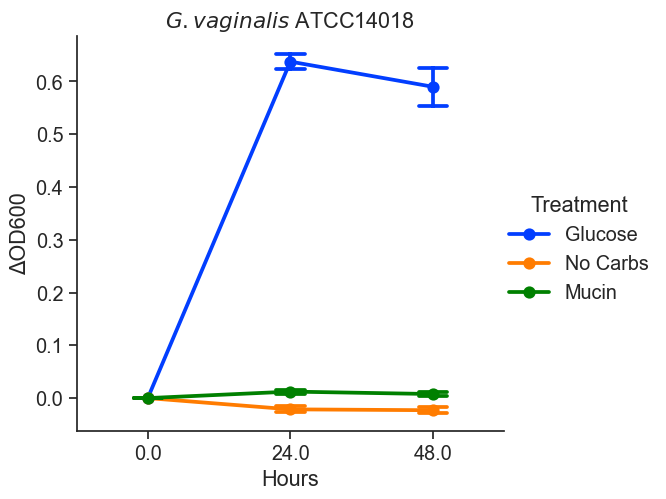

In [13]:
dataToPlot = getIntervalData(df7924, ['G. vaginalis ATCC14018'], ['Glucose', 'No Carbs', 'Mucin'], [0, 24, 48])
plot = sns.catplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=mucinPalette)
plot.set(title='$\it{G. vaginalis}$ ATCC14018', ylabel='ΔOD600')
sns.despine()
#plot.savefig(figurepath.joinpath('7-9-24_Gvaginalis_ATCC14018_interval.png'), bbox_inches='tight', dpi=300)

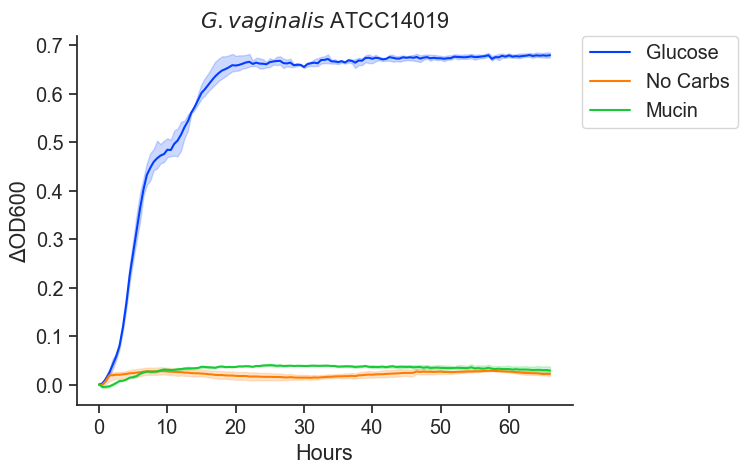

In [14]:
dataToPlot = sliceDFBy(df7924, ['G. vaginalis ATCC14019'], ['Glucose', 'No Carbs', 'Mucin'])
plot = sns.lineplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment')
plot.set(title='$\it{G. vaginalis}$ ATCC14019', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('7-9-24_Gvaginalis_ATCC14019_Mucin.png'))

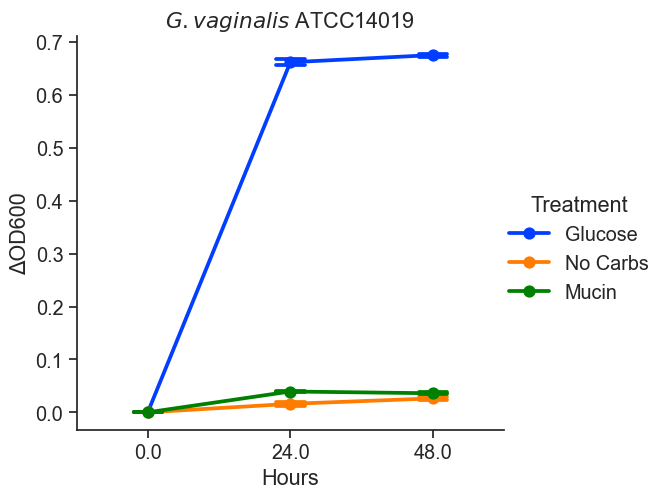

In [15]:
dataToPlot = getIntervalData(df7924, ['G. vaginalis ATCC14019'], ['Glucose', 'No Carbs', 'Mucin'], [0, 24, 48])
plot = sns.catplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=mucinPalette)
plot.set(title='$\it{G. vaginalis}$ ATCC14019', ylabel='ΔOD600')
sns.despine()
#plot.savefig(figurepath.joinpath('7-9-24_Gvaginalis_ATCC14019_interval.png'), bbox_inches='tight', dpi=300)

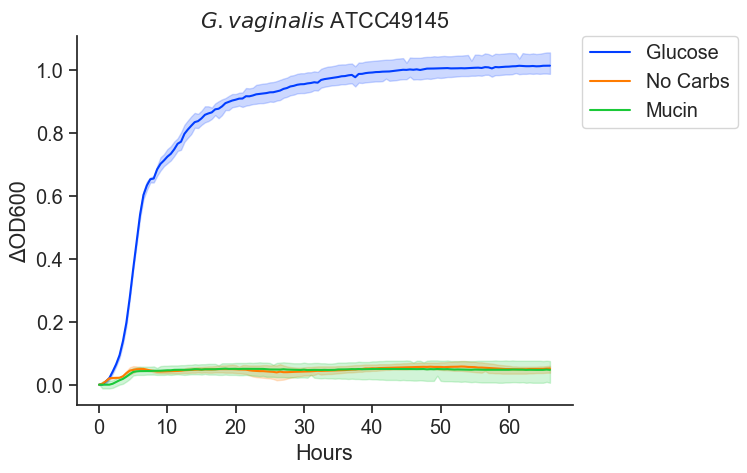

In [16]:
dataToPlot = sliceDFBy(df7924, ['G. vaginalis ATCC49145'], ['Glucose', 'No Carbs', 'Mucin'])
plot = sns.lineplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment')
plot.set(title='$\it{G. vaginalis}$ ATCC49145', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('7-9-24_Gvaginalis_ATCC49145_Mucin.png'))

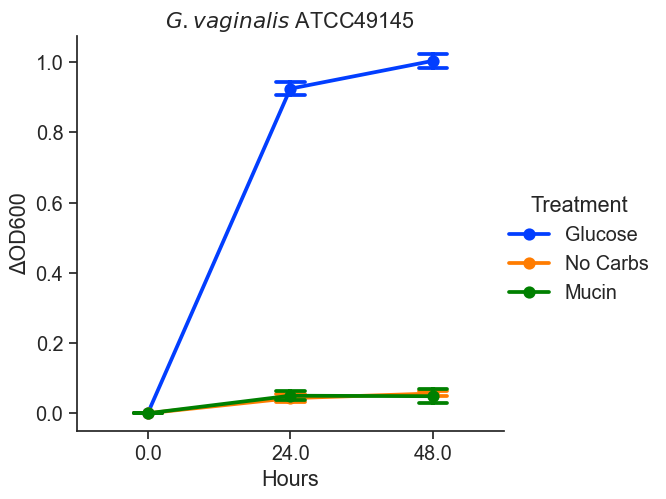

In [17]:
dataToPlot = getIntervalData(df7924, ['G. vaginalis ATCC49145'], ['Glucose', 'No Carbs', 'Mucin'], [0, 24, 48])
plot = sns.catplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=mucinPalette)
plot.set(title='$\it{G. vaginalis}$ ATCC49145', ylabel='ΔOD600')
sns.despine()
#plot.savefig(figurepath.joinpath('7-9-24_Gvaginalis_ATCC49145_interval.png'), bbox_inches='tight', dpi=300)

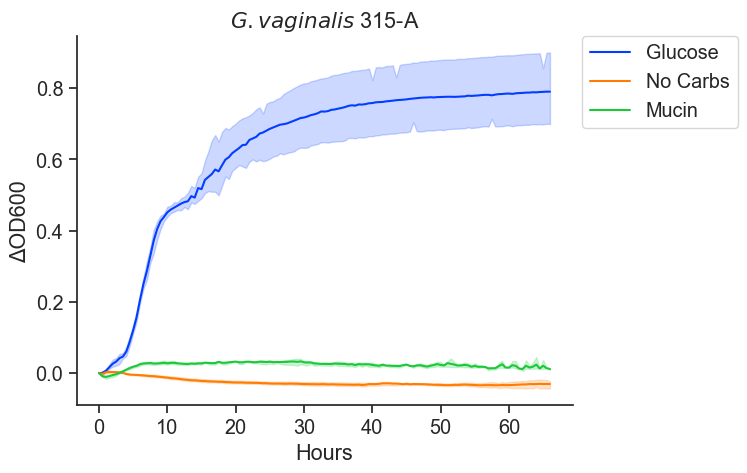

In [18]:
dataToPlot = sliceDFBy(df7924, ['G. vaginalis 315-A'], ['Glucose', 'No Carbs', 'Mucin'])
plot = sns.lineplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment')
plot.set(title='$\it{G. vaginalis}$ 315-A', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('7-9-24_Gvaginalis_315-A_Mucin.png'))

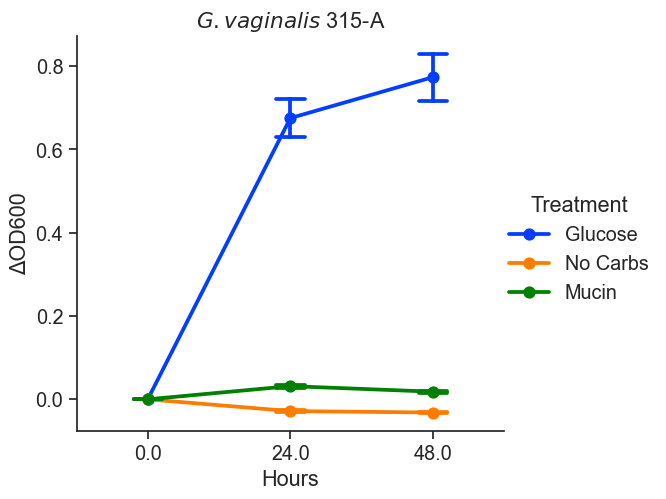

In [19]:
dataToPlot = getIntervalData(df7924, ['G. vaginalis 315-A'], ['Glucose', 'No Carbs', 'Mucin'], [0, 24, 48])
plot = sns.catplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=mucinPalette)
plot.set(title='$\it{G. vaginalis}$ 315-A', ylabel='ΔOD600')
sns.despine()
#plot.savefig(figurepath.joinpath('7-9-24_Gvaginalis_315A_interval.png'), bbox_inches='tight', dpi=300)

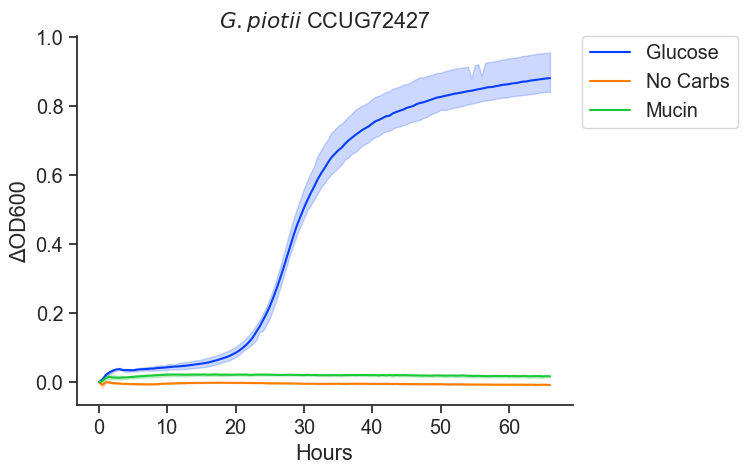

In [20]:
dataToPlot = sliceDFBy(df7924, ['G. piotii CCUG72427'], ['Glucose', 'No Carbs', 'Mucin'])
plot = sns.lineplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment')
plot.set(title='$\it{G. piotii}$ CCUG72427', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('7-9-24_Gpiotii_CCUG72427_Mucin.png'))

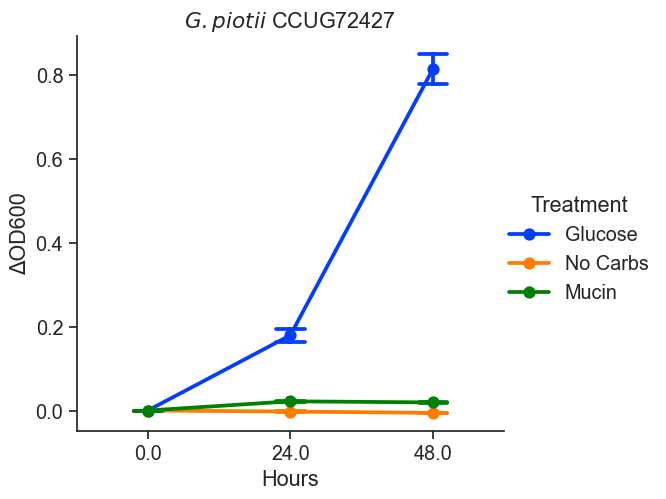

In [21]:
dataToPlot = getIntervalData(df7924, ['G. piotii CCUG72427'], ['Glucose', 'No Carbs', 'Mucin'], [0, 24, 48])
plot = sns.catplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=mucinPalette)
plot.set(title='$\it{G. piotii}$ CCUG72427', ylabel='ΔOD600')
sns.despine()
#plot.savefig(figurepath.joinpath('7-9-24_Gpiotii_CCUG72427_interval.png'), bbox_inches='tight', dpi=300)

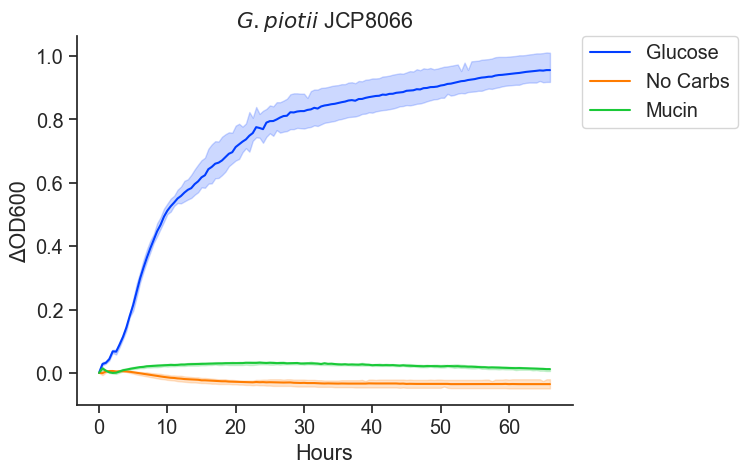

In [22]:
dataToPlot = sliceDFBy(df7924, ['G. piotii JCP8066'], ['Glucose', 'No Carbs', 'Mucin'])
plot = sns.lineplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment')
plot.set(title='$\it{G. piotii}$ JCP8066', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('7-9-24_Gpiotii_JCP8066_Mucin.png'))

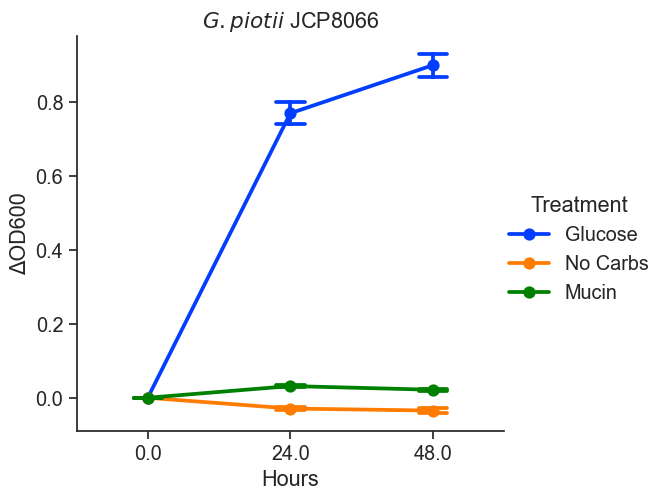

In [23]:
dataToPlot = getIntervalData(df7924, ['G. piotii JCP8066'], ['Glucose', 'No Carbs', 'Mucin'], [0, 24, 48])
plot = sns.catplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=mucinPalette)
plot.set(title='$\it{G. piotii}$ JCP8066', ylabel='ΔOD600')
sns.despine()
#plot.savefig(figurepath.joinpath('7-9-24_Gpiotii_JCP8066_interval.png'), bbox_inches='tight', dpi=300)

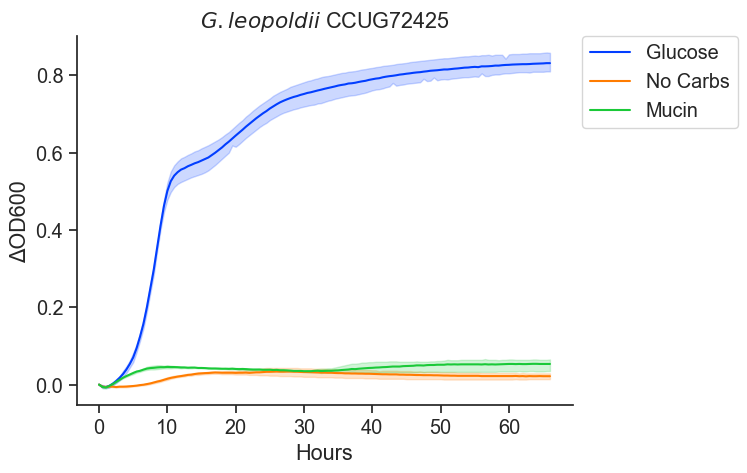

In [24]:
dataToPlot = sliceDFBy(df7924, ['G. leopoldii CCUG72425'], ['Glucose', 'No Carbs', 'Mucin'])
plot = sns.lineplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment')
plot.set(title='$\it{G. leopoldii}$ CCUG72425', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('7-9-24_Gleopoldii_CCUG72425_Mucin.png'))

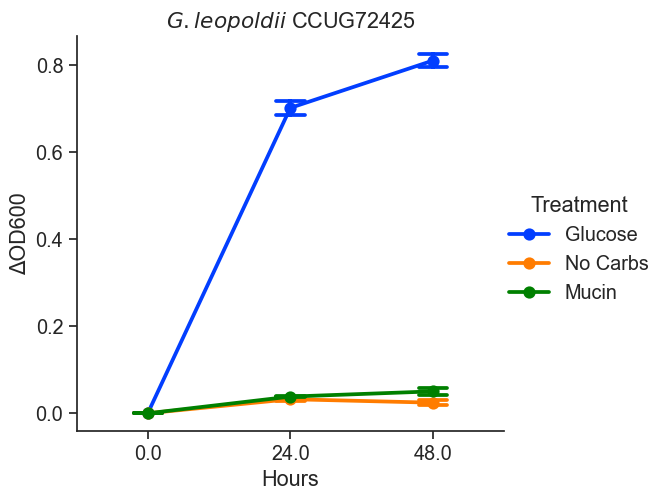

In [25]:
dataToPlot = getIntervalData(df7924, ['G. leopoldii CCUG72425'], ['Glucose', 'No Carbs', 'Mucin'], [0, 24, 48])
plot = sns.catplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=mucinPalette)
plot.set(title='$\it{G. leopoldii}$ CCUG72425', ylabel='ΔOD600')
sns.despine()
#plot.savefig(figurepath.joinpath('7-9-24_Gleopoldii_CCUG72425_interval.png'), bbox_inches='tight', dpi=300)

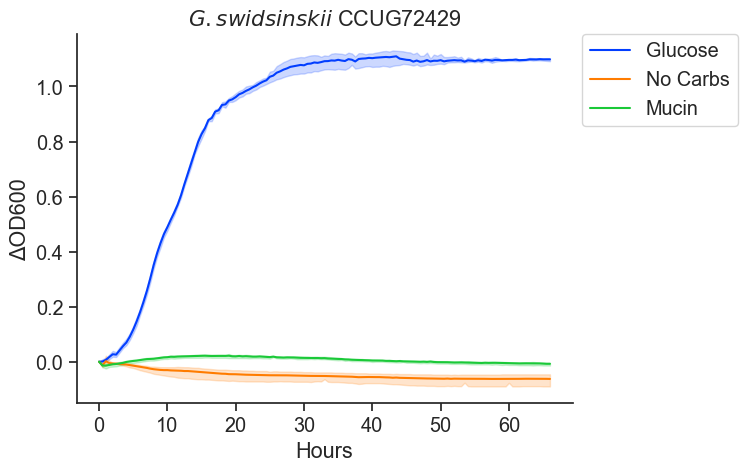

In [27]:
dataToPlot = sliceDFBy(df7924, ['G. swidsinskii CCUG72429'], ['Glucose', 'No Carbs', 'Mucin'])
plot = sns.lineplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment')
plot.set(title='$\it{G. swidsinskii}$ CCUG72429', ylabel='ΔOD600')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()
#saveFig(plot, figurepath.joinpath('7-9-24_Gswidsinskii_CCUG72429_Mucin.png'))#

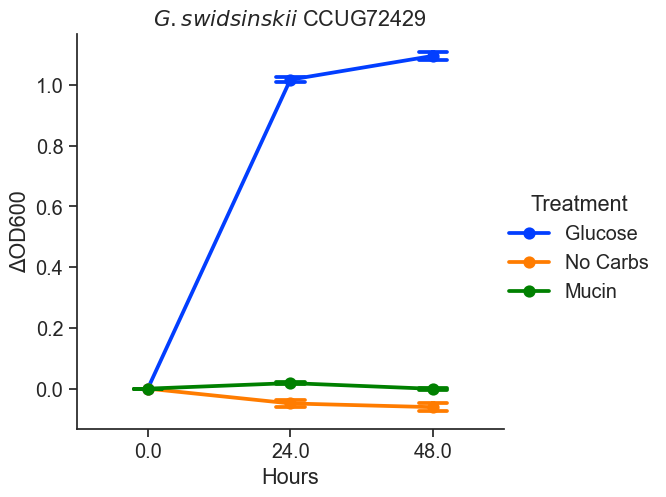

In [28]:
dataToPlot = getIntervalData(df7924, ['G. swidsinskii CCUG72429'], ['Glucose', 'No Carbs', 'Mucin'], [0, 24, 48])
plot = sns.catplot(data=dataToPlot, x='Hours', y='Delta OD600', hue='Treatment', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=mucinPalette)
plot.set(title='$\it{G. swidsinskii}$ CCUG72429', ylabel='ΔOD600')
sns.despine()
#plot.savefig(figurepath.joinpath('7-9-24_Gswidsinskii_CCUG72429_interval.png'), bbox_inches='tight', dpi=300)

In [34]:
# Plot results from initial experiment co-culturing G. vaginalis 315-A with H. timonensis and G. piotii in mucin media
data10424 = pd.read_csv(filepath.joinpath('10-4-24_Gvaginalis_crossfeeding_qPCR.csv'))

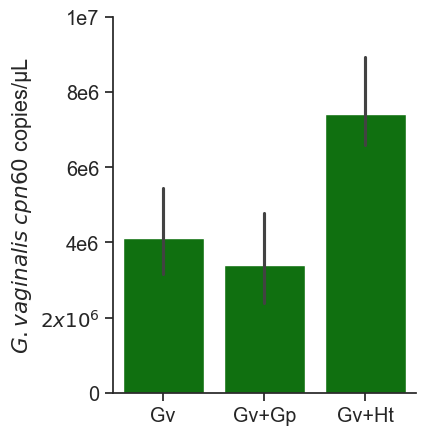

In [36]:
plot = sns.catplot(data=data10424, x='Culture', y='cpn60/uL', kind='bar', color='green', aspect=0.8)
plot.set(ylim=(0, 1e7), xlabel='', ylabel='$\it{G. vaginalis}$ $\it{cpn60}$ copies/μL')
plot.set_yticklabels(labels=['0', '$2x10^6$', '4e6', '6e6', '8e6', '1e7'])
#plot.savefig(figurepath.joinpath('10-4-24_gardnerella_crossfeeding.png'), dpi=300, bbox_inches='tight')

In [37]:
# Graph results from the prevotella mucin experiment on 10/10
data101024 = pd.read_csv(filepath.joinpath('10-10-24_prevotellas_mucin_growth.csv'))

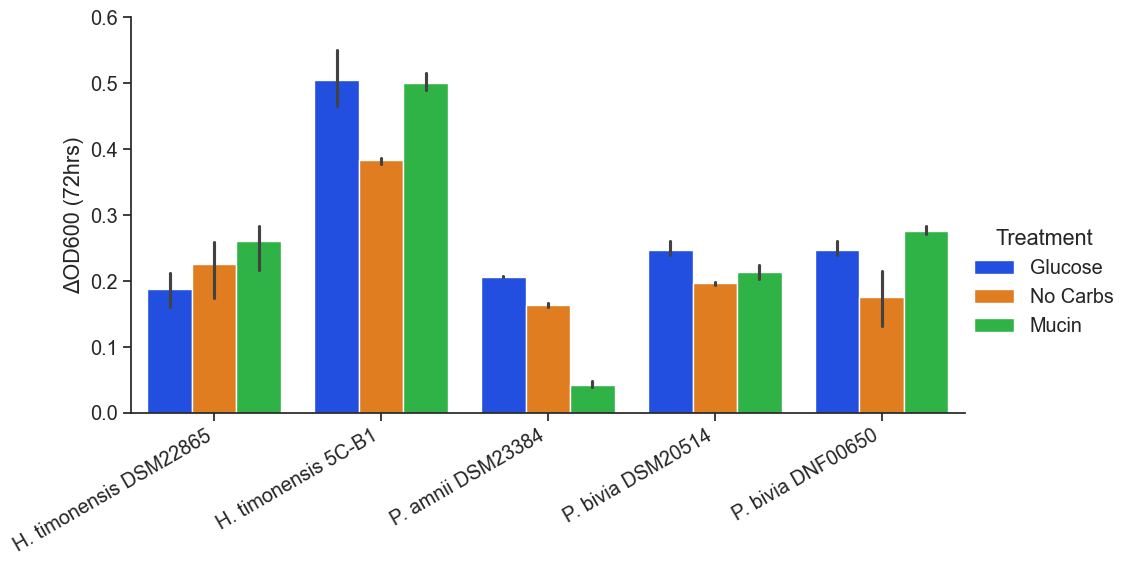

In [38]:
plot = sns.catplot(data=data101024, x='Strain', y='Delta OD600', hue='Treatment', kind='bar', aspect=1.9, order=['H. timonensis DSM22865', 'H. timonensis 5C-B1', 'P. amnii DSM23384', 'P. bivia DSM20514', 'P. bivia DNF00650'])
plot.set(ylim=(0, 0.6), ylabel='ΔOD600 (72hrs)', xlabel='')
plot.set_xticklabels(rotation=30, ha='right')
#plot.savefig(figurepath.joinpath('10-10-24_prevotellas_mucin_growth.png'), dpi=300, bbox_inches='tight')

In [39]:
# Graph the results from the mucin growth experiment on 10/23
data102324 = pd.read_csv(filepath.joinpath('10-23-24_prevotellas_mucin.csv'))

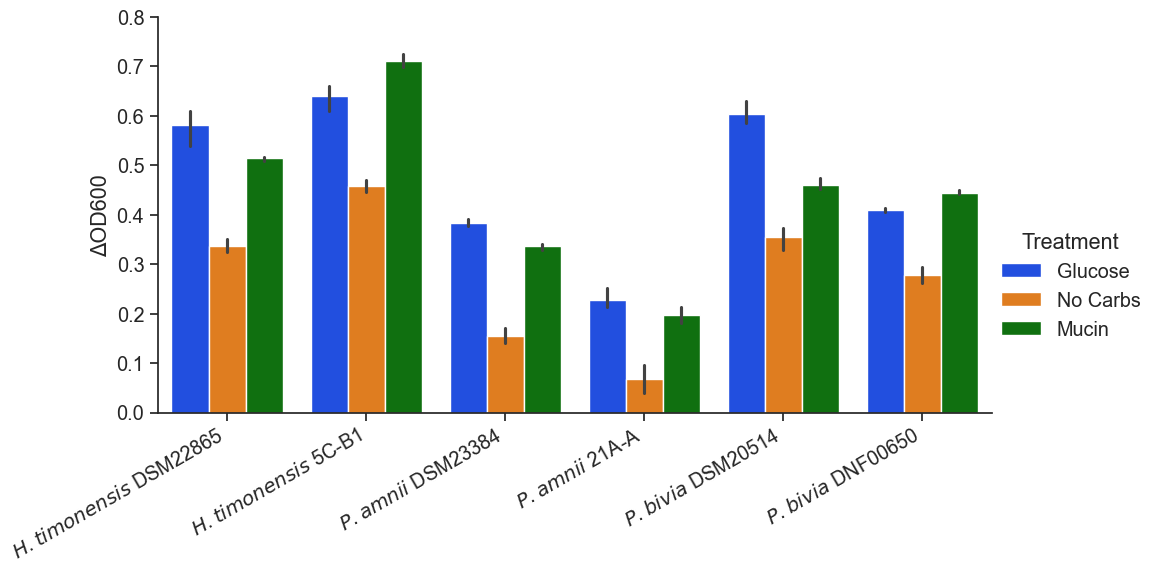

In [40]:
plot = sns.catplot(data=data102324, x='Strain', y='Delta OD600', hue='Treatment', kind='bar', aspect=1.9, palette=mucinPalette)
plot.set(ylim=(0, 0.8), ylabel='ΔOD600', xlabel='')
plot.set_xticklabels(['$\it{H. timonensis}$ DSM22865', '$\it{H. timonensis}$ 5C-B1', '$\it{P. amnii}$ DSM23384', '$\it{P. amnii}$ 21A-A', '$\it{P. bivia}$ DSM20514', '$\it{P. bivia}$ DNF00650'], rotation=30, ha='right')
#plot.savefig(figurepath.joinpath('10-23-24_prevotellas_mucin_growth.png'), dpi=300, bbox_inches='tight')

In [41]:
# Graph coculture data from 10/23/24
data102324dsm = pd.read_csv(filepath.joinpath('10-23-24_dsm22865_coculture.csv'))

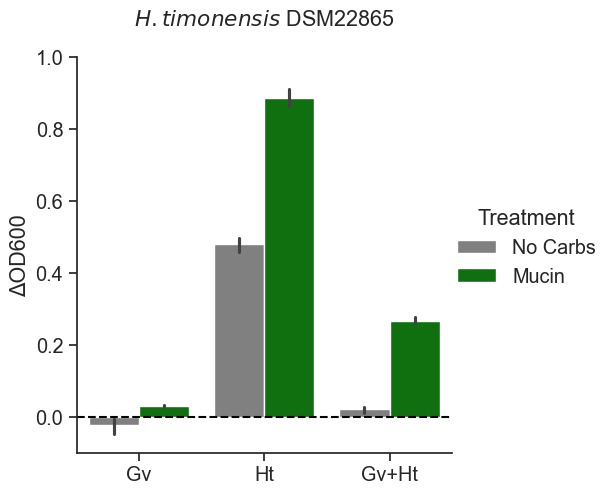

In [42]:
plot = sns.catplot(data=data102324dsm, x='Sample', y='Delta OD600', hue='Treatment', kind='bar', aspect=1, palette=['gray', 'green'])
plot.set(ylim=(-0.1, 1), ylabel='ΔOD600', xlabel='', title='$\it{H. timonensis}$ DSM22865\n')
plt.axhline(0, ls='--', color='black')
#plot.savefig(figurepath.joinpath('10-23-24_coculture_DSM22865.png'), dpi=300, bbox_inches='tight')

In [46]:
data102324cris = pd.read_csv(filepath.joinpath('10-23-24_5cb1_coculture.csv'))

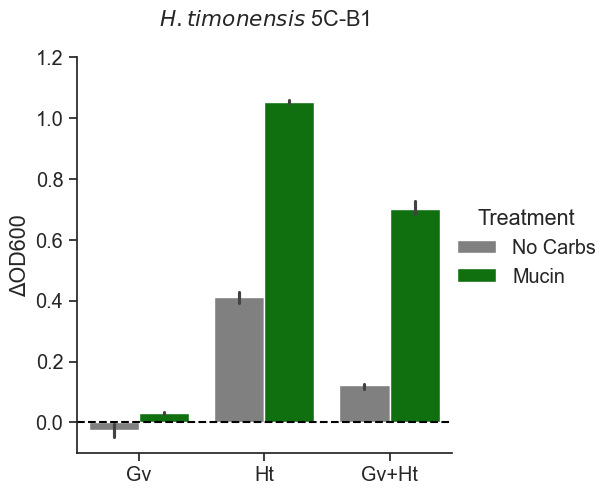

In [47]:
plot = sns.catplot(data=data102324cris, x='Sample', y='Delta OD600', hue='Treatment', kind='bar', aspect=1, palette=['gray', 'green'])
plot.set(ylim=(-0.1, 1.2), ylabel='ΔOD600', xlabel='', title='$\it{H. timonensis}$ 5C-B1\n')
plt.axhline(0, ls='--', color='black')
#plot.savefig(figurepath.joinpath('10-23-24_coculture_5cb1.png'), dpi=300, bbox_inches='tight')

In [48]:
# Try to graph the data from the G. vaginalis-H. timonensis mucin cross-feeding experiment
data103124 = pd.read_csv(filepath.joinpath('10-31-24_gardnerella_qpcr.csv'))

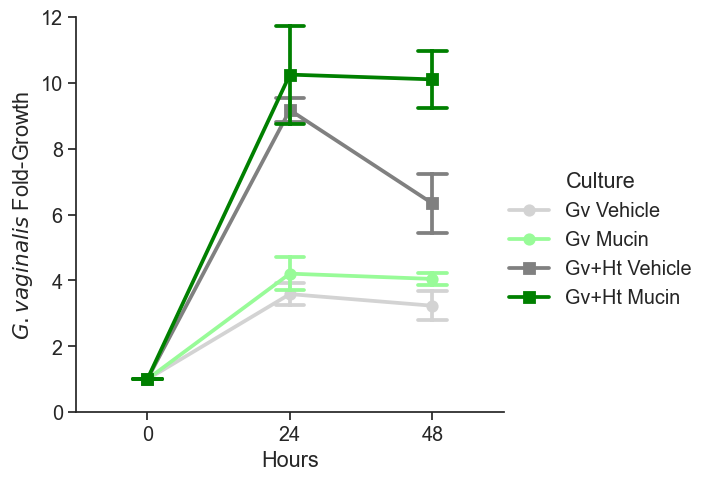

In [49]:
plot = sns.catplot(data=data103124, x='Hours', y='Fold-Growth', hue='Culture', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=['lightgray', 'palegreen', 'gray', 'green'], markers=['o', 'o', 's', 's'])
plot.set(ylim=(0, 12), ylabel='$\it{G. vaginalis}$ Fold-Growth')
#plot.savefig(figurepath.joinpath('10-31-24_crossfeeding_gardnerella.png'), dpi=300, bbox_inches='tight')

In [50]:
data111424 = pd.read_csv(filepath.joinpath('11-14-24_htim_qpcr.csv'))

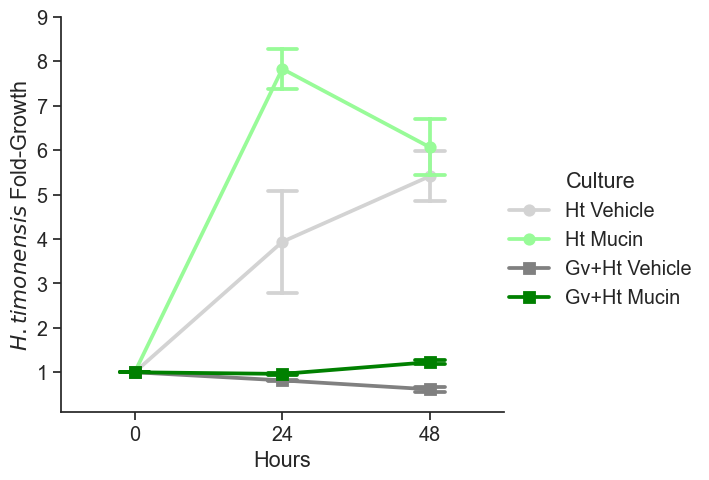

In [51]:
plot = sns.catplot(data=data111424, x='Hours', y='Fold-Growth', hue='Culture', capsize=.2, errorbar='se', kind='point', aspect=1.1, palette=['lightgray', 'palegreen', 'gray', 'green'], markers=['o', 'o', 's', 's'])
plot.set(ylim=(0.1, 9), ylabel='$\it{H. timonensis}$ Fold-Growth')
#plot.savefig(figurepath.joinpath('11-14-24_crossfeeding_htimonensis.png'), dpi=300, bbox_inches='tight')